# IMPORTS

In [74]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

# METHOD DEFINITION

In [75]:
def plot_simple(x, y):
  global size
  plt.xlabel("Date or sampling")
  plt.ylabel("Stock value")
  plt.title("Stock value history")
  plt.plot(x, y, markersize = size)

def plot_data(df):
  global size
  plt.xlabel("Date or sampling")
  plt.ylabel("Stock value")
  plt.title("Stock OPEN value history")
  plt.plot(np.arange(0, len(df.Date)), df.Open, markersize = size)
  plt.title("Stock HIGH value history")
  plt.plot(np.arange(0, len(df.Date)), df.High, markersize = size)
  plt.title("Stock LOW value history")
  plt.plot(np.arange(0, len(df.Date)), df.Low, markersize = size)
  plt.title("Stock CLOSE value history")
  plt.plot(np.arange(0, len(df.Date)), df.Close, markersize = size)

def load_data(url):
  df = pd.read_csv(url)

# LOAD DATA

In [76]:
#x_train, y_train, x_val, y_val, x_test, y_test = load_data("/content/AAPL.csv")
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df = pd.read_csv("/content/AAPL.csv")
df = df.reindex(['Data', 'Volume', 'Open', 'High', 'Low', 'Close', 'Adj Close'], axis=1)
df = df.values
data = df[:, 1:6]
data = scaler.fit_transform(data)
labels = df[:, 6:]
print(data.shape)
print(labels.shape)
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.25)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(10468, 5)
(10468, 1)
(6280, 5)
(6280, 1)
(2094, 5)
(2094, 1)
(2094, 5)
(2094, 1)


# MODEL

In [77]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(1))

Train the model
:

In [78]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['MSE'])
model.fit(x_train, y_train, epochs=50, batch_size=8, validation_data=(x_val, y_val), verbose=2)

Epoch 1/50
785/785 - 17s - loss: 837.2505 - MSE: 837.2505 - val_loss: 650.1042 - val_MSE: 650.1042 - 17s/epoch - 22ms/step
Epoch 2/50
785/785 - 10s - loss: 501.3394 - MSE: 501.3394 - val_loss: 430.9933 - val_MSE: 430.9933 - 10s/epoch - 13ms/step
Epoch 3/50
785/785 - 8s - loss: 339.0384 - MSE: 339.0384 - val_loss: 290.6442 - val_MSE: 290.6442 - 8s/epoch - 11ms/step
Epoch 4/50
785/785 - 8s - loss: 231.3503 - MSE: 231.3503 - val_loss: 195.2929 - val_MSE: 195.2929 - 8s/epoch - 10ms/step
Epoch 5/50
785/785 - 8s - loss: 157.2206 - MSE: 157.2206 - val_loss: 126.4183 - val_MSE: 126.4183 - 8s/epoch - 11ms/step
Epoch 6/50
785/785 - 8s - loss: 103.5153 - MSE: 103.5153 - val_loss: 78.3794 - val_MSE: 78.3794 - 8s/epoch - 11ms/step
Epoch 7/50
785/785 - 8s - loss: 66.5185 - MSE: 66.5185 - val_loss: 49.3585 - val_MSE: 49.3585 - 8s/epoch - 11ms/step
Epoch 8/50
785/785 - 9s - loss: 44.0885 - MSE: 44.0885 - val_loss: 31.2570 - val_MSE: 31.2570 - 9s/epoch - 11ms/step
Epoch 9/50
785/785 - 9s - loss: 31.795

In [79]:
Predicted_data = model.predict(x_test)

66/66 [==============================] - 2s 5ms/step


# PLOT DATA

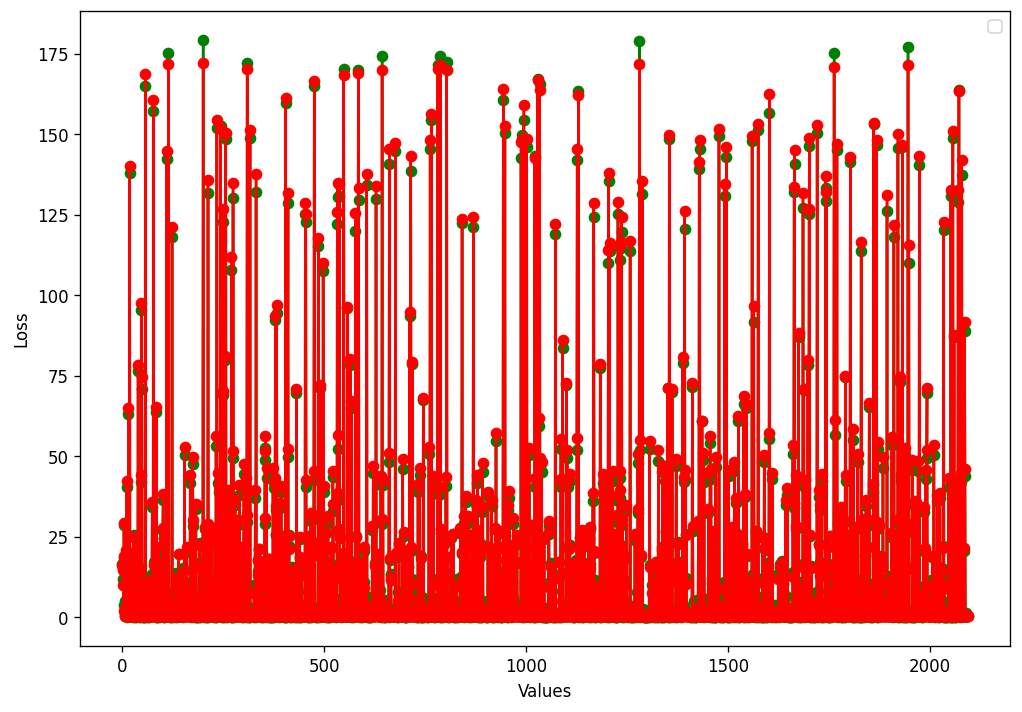

In [80]:
plt.figure(num=None, figsize=(10, 7), dpi=120, facecolor='w', edgecolor='k')
plt.plot(y_test, color='g', marker='o')
plt.plot(Predicted_data, color='r', marker='o')
plt.xlabel('Values')
plt.ylabel('Loss')
plt.legend(loc='upper right')

AttributeError: ignored

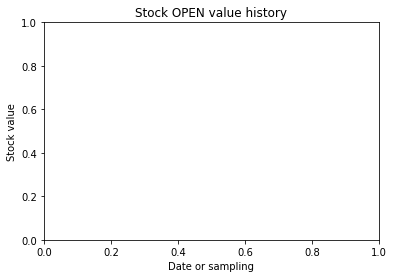

In [81]:
plot_data(df)
#plot(df.Date, df.Open)
df.tail()

In [ ]:
plt.plot(np.arange(0, len(df.Open[:500])), df.Open[:500])